<a href="https://colab.research.google.com/github/sehgalsakshi/Text-Summarization-and-Headline-Generation-Using-T5/blob/main/ExtractPDF_OCR_and_Regular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,417 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../tesserac

In [ ]:
!pip install PyPDF2
!pip install textract
!pip install nltk

     |████████████████████████████████| 81kB 2.2MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61087 sha256=0dd43debb8fb8e0a1a4a5dd1dbaa653c960e4570b02af279ce4f2c083d614fca
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
     |████████████████████████████████| 112kB 7.8MB/s 
     |████████████████████████████████| 8.9MB 34.1MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 5.6MB 43.8MB/s 
     |████████████████████████████████| 112kB 40.1MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 32.8MB 97kB/s 
     |████████████████████████████████| 153kB 46.3MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 112kB 51.0MB/s 
     |████████████████████████████████| 13.7MB 337kB/s 
  Created wheel for python-pptx: filename=python_ppt

In [ ]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
# update 1
!conda install -q -y --prefix /usr/local poppler

--2020-12-27 22:22:10--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   163MB/s    in 0.3s    

2020-12-27 22:22:10 (163 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6

In [ ]:
import PyPDF2 
import textract 
import re

In [ ]:
filename = 'Non-text-searchable.pdf' #open allows you to read the file.pdfFileObj = open(filename,'rb')#The pdfReader variable is a readable object that will be parsed.pdfReader = PyPDF2.PdfFileReader(pdfFileObj)#Discerning the number of pages will allow us to parse through all the pages.num_pages = pdfReader.numPages
pdfFileObj = open(filename,'rb')#The pdfReader variable is a readable object that will be parsed.
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
num_pages = pdfReader.numPages
count = 0
text = ""#The while loop will read each page.
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()#This if statement exists to check if the above library returned words. It's done because PyPDF2 cannot read scanned files.if text != "":
if text != '':
  text = text#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text.else:
else:
  text = textract.process(filename, method='tesseract', language='eng')

In [ ]:
text

'IDRH\nNon-text-searchable PDF\n\nThis is an example of a non-text-searchable PDF. Because it was created from\nan image rather than a text document, it cannot be rendered as plain text by the\nPDF reader. Thus, attempting to select the text on the page as though it were a\ntext document or website will not work, regardless of how neatly it is organized.\n\x0c'

In [ ]:
pattern = '(\.|!|-|_|/|,|:|\\|\n)' + '{1,}'
re.sub(pattern, r'\1', text.decode('utf-8')) 

'IDRH\nNon-text-searchable PDF\n\nThis is an example of a non-text-searchable PDF. Because it was created from\nan image rather than a text document, it cannot be rendered as plain text by the\nPDF reader. Thus, attempting to select the text on the page as though it were a\ntext document or website will not work, regardless of how neatly it is organized.\n\x0c'

In [ ]:
def is_ascii(s):
    try:
        s.decode('ascii')
        return True
    except UnicodeDecodeError:
        return False

In [ ]:
def remove_non_utf(text):
    return ' '.join([word.encode('ascii', 'ignore').decode('ascii') for word in text.split()])

In [ ]:
def clean_text(text):
  text = text.decode('ascii') if 'byte' in str(type(text)) else text
  pattern = '(\.|!|-|_|/|,|:|\\|;)' + '{1,}'   #Remove multiple occurances of punctuation marks by single
  text = re.sub(pattern, r'\1', text) 
  text = re.sub(r'\s+([?.!"])', r'\1', text)
  return remove_non_utf(text)

In [ ]:
clean_text(text)

'IDRH Non-text-searchable PDF This is an example of a non-text-searchable PDF. Because it was created from an image rather than a text document, it cannot be rendered as plain text by the PDF reader. Thus, attempting to select the text on the page as though it were a text document or website will not work, regardless of how neatly it is organized.'

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [ ]:
stopwords = set(STOPWORDS) 

In [ ]:
import texthero as hero
import pandas as pd
df = pd.DataFrame({'text':text}, index=[0])
df['clean_content'] = hero.clean(df.text)

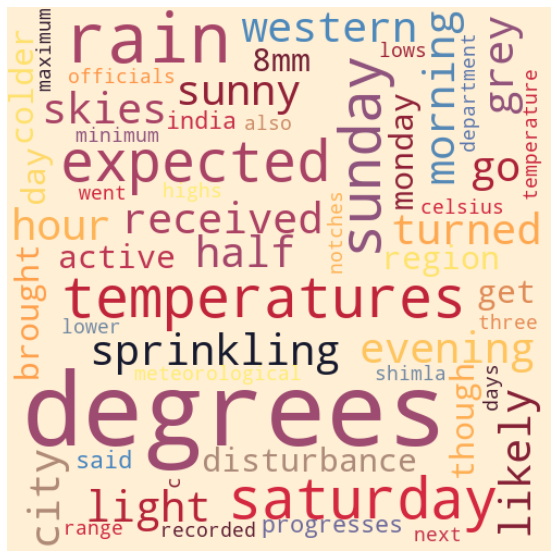

In [ ]:
#Plot wordcloud image using WordCloud method
wc = hero.wordcloud(df.clean_content, max_words=100, height=500, width=500, return_figure= True)

In [ ]:
import matplotlib.pyplot as plt
from io import BytesIO
import base64
hero.wordcloud(df.clean_content, max_words=100, height=500, width=500, return_figure= True)
img = BytesIO()
plt.savefig(img, format='png')
plt.close()
img.seek(0)
plot_url = base64.b64encode(img.getvalue()).decode('utf8')

In [ ]:
plot_url

'iVBORw0KGgoAAAANSUhEUgAABaAAAALQCAYAAABmJdeHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdZ5BcV3rm+f+9N70p7z28B0kABD2b3S12N1utbrVmZhXSSCtFb4zRbMSs/7YRq43Y2BjtxkZoQoqY2YldrTTdIzNt1ZbqbrLpPQmAILypKpT3lVnp3dkPJ1GoQhWAgkmAIJ8fI4OozHvuPfdmFgr15JvvcYwxBhERERERERERERGRO8y91xMQERERERERERERkU8mBdAiIiIiIiIiIiIiUhMKoEVERERERERERESkJhRAi4iIiIiIiIiIiEhNKIAWERERERERERERkZpQAC0iIiIiIiIiIiIiNaEAWkRERERERERERERqQgG0iIiIiIiIiIiIiNSEAmgRERERERERERERqQkF0CIiIiIiIiIiIiJSEwqgRURERERERERERKQmFECLiIiIiIiIiIiISE0ogBYRERERERERERGRmlAALSIiIiIiIiIiIiI1oQBaRERERERERERERGpCAbSIiIiIiIiIiIiI1IQCaBERERERERERERGpCQXQIiIiIiIiIiIiIlITCqBFREREREREREREpCYUQIuIiIiIiIiIiIhITSiAFhEREREREREREZGaUAAtIiIiIiIiIiIiIjWhAFpEREREREREREREakIBtIiIiIiIiIiIiIjUhAJoEREREREREREREakJBdAiIiIiIiIiIiIiUhMKoEVERERERERERESkJhRAi4iIiIiIiIiIiEhNKIAWERERERERERERkZpQAC0iIiIiIiIiIiIiNaEAWkRERERERERERERqQgG0iIiIiIiIiIiIiNSEAmgRERERERERERERqQk

In [ ]:
text = '''Skies turned grey on Sunday evening after a sunny morning as the city received a light sprinkling of rain for about half an hour.
Temperatures are likely to go up because of the western disturbance active in the region that brought rain of 0.8mm, though Monday is expected to get colder as the day progresses, with more rain, said India Meteorological Department officials.
Highs of 20.2 degrees Celsius were recorded on Sunday after Saturday’s 19 degrees C. Minimum temperature also went up to 4.1 degrees from Saturday’s 4 degrees, a few notches lower than Shimla’s 4.7 degrees.
Maximum temperatures in the next three days are expected to range between 17 degrees and 18 degrees with lows of 5 degrees to 8 degrees.
'''

In [ ]:
pip install texthero

     |████████████████████████████████| 1.4MB 6.3MB/s 
     |████████████████████████████████| 245kB 18.1MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434675 sha256=b2b9298892273181d2ff2eee3ae6b653c26727140389dc0386723708e47a1a20
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

NameError: ignored